In [75]:
import numpy as np
import pandas as pd
import scipy as spy
import matplotlib.pyplot as plt
import time
import random
import operator
import random
import seaborn as sns
sns.set_style("darkgrid")

# Playground for Genetic Algorithms



### Core idea is to iterate over the following sequence of events:
    
#### 1) Initial population (or generating a new one)
#### 2) Evaluation of population
#### 3) Fittest of the survival
#### 4) Reproduction
#### 5) Mutation

# Fittest of the survival vs Fittest of the stochastic

## Fitness function

In [2]:
def fitness_score(root, other):
    
    if len(root) != len(other):
        print("Wrong len")
        return 
    
    score = 0
    for i in range(len(root)):
        if root[i] == other[i]:
            score += 1

    # Min score = 0
    # Max score = 100
    # score = nbr of digits correct / total nbr of digits
            
    return score * 100 / len(root)

## Numbers are individuals and digits genes

In [3]:
def generateNbr(length):
    return ''.join(map(str, [str(random.randrange(0, 10, 1)) for _ in range(length)]))

def generateInitialPop(popSize, root):
    pop = []
    for i in range(popSize):
        pop.append(generateNbr(len(root)))
    return pop

## Select the most fit from the current population

1) Pick the most fit individuals
2) Generate children from these

OBS! Do not only pick the most fit early on, might converge badly too soon. Solution: add randomness.

### Survival of the fittest

In [4]:
def selectFromPopulation(pop, root, nbr_of_fittest, nbr_of_random):
    
    # Sort on fitness
    bestPopSorted = {}
    
    for individual in pop:
        bestPopSorted[individual] = fitness_score(root, individual)
    
    bestPopSorted= sorted(bestPopSorted.items(), key = operator.itemgetter(1), reverse=True)

    nextGeneration = []

    # Add the x most fittest
    for i in range(nbr_of_fittest):
        nextGeneration.append(bestPopSorted[i][0])
    
    # Add some randomness
    for i in range(nbr_of_random):
        nextGeneration.append(random.choice(bestPopSorted)[0])
    
    random.shuffle(nextGeneration)
    
    return nextGeneration

def getFittestIndividualsSorted(population, password):
    fittestPop = {}
    for individual in population:
        fittestPop[individual] = fitness_score(password, individual)
    return sorted(fittestPop.items(), key = operator.itemgetter(1), reverse=True)

### Survival of the stochastic

In [135]:
def selectFromPopulationStochastically(pop, root, nbr_of_random):
    
    # Sort on fitness
    bestPopSorted = {}
    
    for individual in pop:
        bestPopSorted[individual] = fitness_score(root, individual)
    
    bestPopSorted= sorted(bestPopSorted.items(), key = operator.itemgetter(1), reverse=True)

    nextGeneration = []
    
    # Only add random individuals
    for i in range(nbr_of_random):
        nextGeneration.append(random.choice(bestPopSorted)[0])
    
    random.shuffle(nextGeneration)
    
    return nextGeneration

## Produce new children from parents

### Fittest version

In [136]:
def produceChildren(parents, nbr_of_children):
    nextPopulation = []
    
    for i in range(len(parents) // 2):
        for j in range(nbr_of_children):
            
            a = parents[i]
            b = parents[len(parents)-1-i]
            
            child = ""
            
            for k in range(len(a)):
                
                # Randomly assign genes to child from parents a and b
                
                if random.randint(0,1) == 0:
                    child += a[k]
                else:
                    child += b[k]
            
            
            nextPopulation.append(str(child))

    return nextPopulation

## Mutation

In [137]:
def mutateChild(child):
    
    idx = random.randint(0, len(child)-1)
    mutation = str(random.randint(0, 9))
    
    if idx == 0:
        child = str(mutation) + child[1:]
    else:
        child = child[:idx] + mutation + child[idx+1:]
    return child

def mutatePopulation(pop, mutation_risk):
    for i in range(len(pop)):
        if random.random() < mutation_risk:
            pop[i] = mutateChild(pop[i])
    return pop

## Create the next generation from the precious

In [138]:
def generateNextGenerationFittest(firstPop, root, nbr_of_fittest, nbr_of_random, number_of_child, chance_of_mutation):
    nextParents = selectFromPopulation(firstPop, root, nbr_of_fittest, nbr_of_random)
    nextPopulation = produceChildren(nextParents, number_of_child)
    nextGenerationFittest = mutatePopulation(nextPopulation, chance_of_mutation)
    
    return nextGenerationFittest

In [139]:
def generateNextGenerationStochastic(firstPop, root, nbr_of_fittest, nbr_of_random, number_of_child, chance_of_mutation):
    nextParents = selectFromPopulationStochastically(firstPop, root, nbr_of_fittest + nbr_of_random)
    nextPopulation = produceChildren(nextParents, number_of_child)
    nextGenerationStochastic = mutatePopulation(nextPopulation, chance_of_mutation)
    
    return nextGenerationStochastic

## Evaluations functions

In [140]:
def getListFittestIndividualFromHistory(history, roott):
    bestIndividuals = []
    for population in history:
        bestIndividuals.append(getFittestIndividualsSorted(population, root)[0])
    return bestIndividuals

In [141]:
def evaluateFittest(historyFittest, historyStochastic, root):
    plt.figure(figsize=(15, 10))

    evolutionFitness = []
    for population in historyFittest:
        evolutionFitness.append(getFittestIndividualsSorted(population, root)[1][1])
    
    evolutionStochastic = []
    for population in historyStochastic:
        evolutionStochastic.append(getFittestIndividualsSorted(population, root)[1][1])
    
    x1 = np.arange(len(evolutionFitness))
    x2 = np.arange(len(evolutionStochastic))

    y1 = evolutionFitness
    y2 = evolutionStochastic


    plt.subplot(2, 1, 1)
    plt.subplots_adjust(bottom=-0.25)
    plt.plot(x1, y1, 'k-')
    plt.ylim((0, 105))
    plt.xlim((0, 100))
    plt.title('Fittest individual in population - Fittest').set_size(20)
    plt.xlabel('Generation').set_size(16)
    plt.ylabel('Fitness').set_size(16)


    plt.subplot(2, 1, 2)
    plt.plot(x2, y2, 'r-')
    plt.ylim((0, 105))
    plt.xlim((0, 100))
    plt.title('Fittest individual in population - Stochastic').set_size(20)
    plt.xlabel('Generation').set_size(16)
    plt.ylabel('Fitness').set_size(16)

In [142]:
def evaluateAverage(historyFittest, historyStochastic, root, pop_size):
    plt.figure(figsize=(15, 10))
   
    evolutionFitness = []
    for population in historyFittest:
        fittestSorted = getFittestIndividualsSorted(population, root)
        averageFitness = 0
        for individual in fittestSorted:
            averageFitness += individual[1]
        evolutionFitness.append(averageFitness/pop_size)
    
    evolutionStochastic = []
    for population in historyStochastic:
        fittestSorted = getFittestIndividualsSorted(population, root)
        averageFitness = 0
        for individual in fittestSorted:
            averageFitness += individual[1]
        evolutionStochastic.append(averageFitness/pop_size)
    
    x1 = np.arange(len(evolutionFitness))
    x2 = np.arange(len(evolutionStochastic))

    y1 = evolutionFitness
    y2 = evolutionStochastic


    plt.subplot(2, 1, 1)
    plt.subplots_adjust(bottom=-0.25)
    plt.plot(x1, y1, 'k-')
    plt.ylim((0, 105))
    plt.xlim((0, 100))
    plt.title('Average fitness in population - Fittest').set_size(20)
    plt.xlabel('Generation').set_size(16)
    plt.ylabel('Fitness').set_size(16)

    plt.subplot(2, 1, 2)
    plt.plot(x2, y2, 'r-')
    plt.ylim((0, 105))
    plt.xlim((0, 100))
    plt.title('Average fitness in population - Stochastic').set_size(20)
    plt.xlabel('Generation').set_size(16)
    plt.ylabel('Fitness').set_size(16)

In [143]:
def runFittestOfTheSurvival():
    history = []
    firstPop = generateInitialPop(pop_size, root)
    history.append(firstPop)

    for i in range(nbr_of_generation):
        nextGen = generateNextGenerationFittest(history[i], root, nbr_of_fittest, nbr_of_random, nbr_of_children, chance_of_mutation)
        history.append(nextGen)


    result = getListFittestIndividualFromHistory(history, root)[nbr_of_generation-1]
   
    print("*************************************")
    print("Strongest individual - Fittest: ", result[0])
    print("Fitness level: ", result[1])
    print("*************************************")
    
    return history, result[1]

In [144]:
def runStochasticSurvival():
    history = []
    firstPop = generateInitialPop(pop_size, root)
    history.append(firstPop)

    for i in range(nbr_of_generation):
        nextGen = generateNextGenerationStochastic(history[i], root, nbr_of_fittest, nbr_of_random, nbr_of_children, chance_of_mutation)
        history.append(nextGen)


    result = getListFittestIndividualFromHistory(history, root)[nbr_of_generation-1]
    
    print("*************************************")
    print("Strongest individual - Stochastic: ", result[0])
    print("Fitness level: ", result[1])
    print("*************************************")
    
    return history, result[1]

## Params

In [123]:
root = "52342335009281309281372395234233500928130928137239"
nbr_of_fittest = 20
nbr_of_random = 20
nbr_of_children = 5
chance_of_mutation = 0.25
nbr_of_generation = 100
pop_size = 100

if ((nbr_of_fittest + nbr_of_random) / 2 * nbr_of_children != pop_size):
    print ("population size not stable")

## Run

In [132]:
itr = 5

fittestLevelDataSurvival = np.zeros(itr)
fittestLevelDataStochastic = np.zeros(itr)

for i in range(itr):
    print("\nIteration: " + str(i+1), "\n")
    historyFittest, fittestLevelFittest = runFittestOfTheSurvival()
    historyStochastic, fittestLevelStochastic = runStochasticSurvival()
    fittestLevelDataSurvival[i] = fittestLevelFittest
    fittestLevelDataStochastic[i] = fittestLevelStochastic


Iteration: 1 

*************************************
Strongest individual - Fittest:  52342335009281309281372395294233500928130928137239
Fitness level:  98.0
*************************************
*************************************
Strongest individual - Stochastic:  47977962294223844147013699914804615824238667116947
Fitness level:  12.0
*************************************

Iteration: 2 

*************************************
Strongest individual - Fittest:  52342335009281309281372395233233500928130928137239
Fitness level:  98.0
*************************************
*************************************
Strongest individual - Stochastic:  29384751246825082456314707459672572821322221319295
Fitness level:  12.0
*************************************

Iteration: 3 

*************************************
Strongest individual - Fittest:  52342335009281309281376795234233500928130928137239
Fitness level:  96.0
*************************************
*************************************
Str

In [133]:
print("Average fittest individual - Fittest: ", fittestLevelDataSurvival.mean())
print("Average fittest individual - Stochastic: ", fittestLevelDataStochastic.mean())

Average fittest individual - Fittest:  98.0
Average fittest individual - Stochastic:  13.6


# Evaluate result

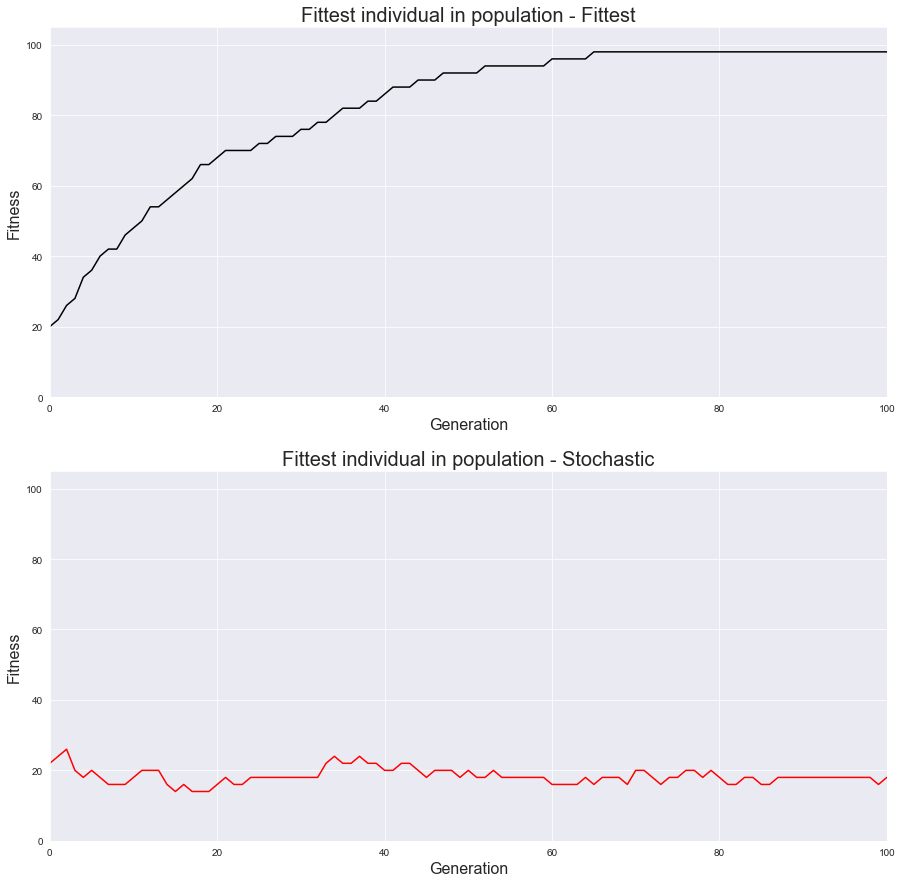

In [134]:
evaluateFittest(historyFittest, historyStochastic, root)

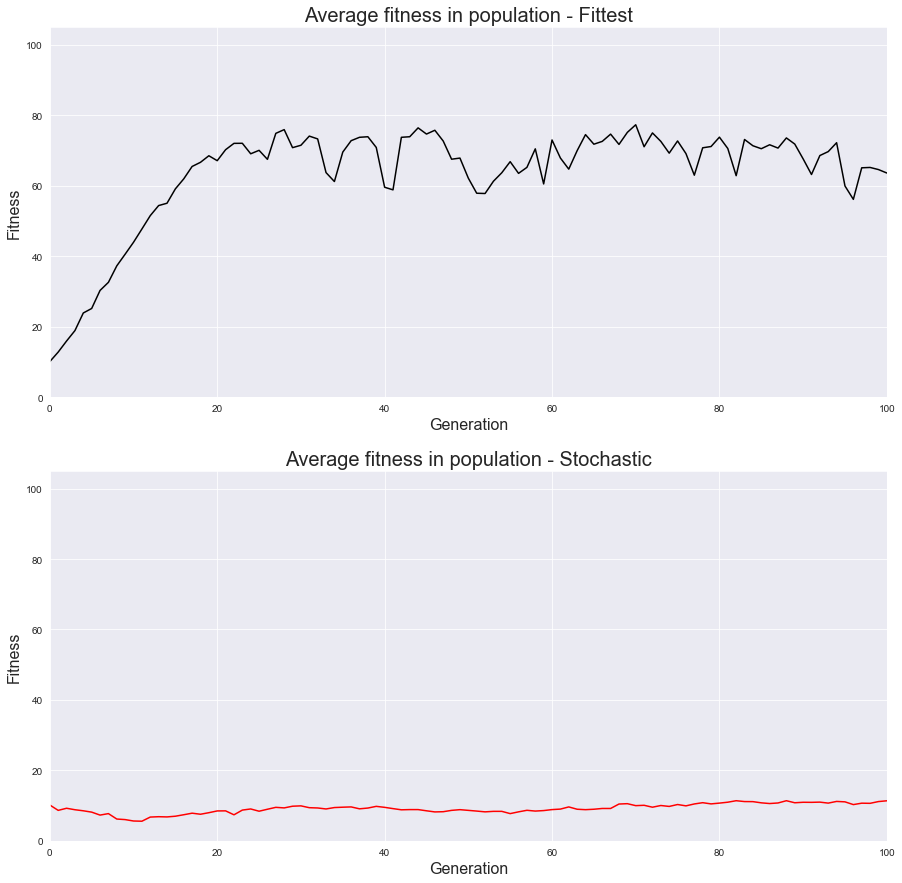

In [127]:
evaluateAverage(historyFittest, historyStochastic, root, pop_size)